# Gráficas extra

## Gráfica para el problema 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

In [2]:
proton_number = np.linspace(31, 36, 6)
binding_energy = np.array([651.811, 659.686, 659.485, 661.775, 655.989, 652.694])
element = np.array(['Ga', 'Ge', 'As', 'Se', 'Br', 'Kr'])

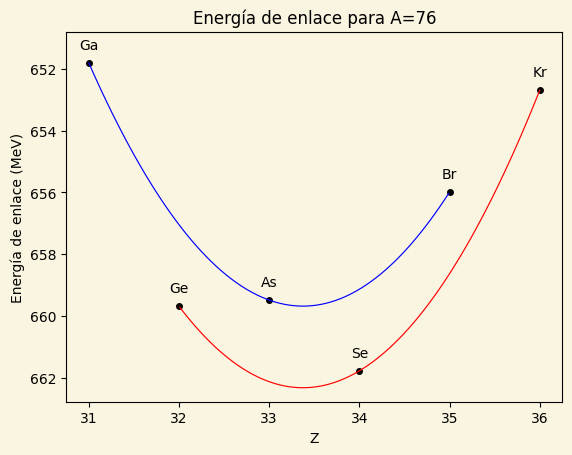

In [4]:
df = pd.DataFrame({'Z': proton_number, 'E': binding_energy, 'Element': element})
even_protons = df[df["Z"] % 2 == 0]
odd_protons = df[df["Z"] % 2 != 0]

fig, ax = plt.subplots()

# Scatter plots for even and odd 'Z' values
ax.plot(even_protons["Z"], even_protons["E"], "ok", ms=4)
ax.plot(odd_protons["Z"], odd_protons["E"], "ok", ms=4)

# Interpolation for smooth lines within the range of the data
x = np.linspace(df["Z"].min(), df["Z"].max(), 100)
x_even = even_protons["Z"]
x_odd = odd_protons["Z"]
f_even = interp1d(x_even, even_protons["E"], kind="quadratic", bounds_error=False)
f_odd = interp1d(x_odd, odd_protons["E"], kind="quadratic", bounds_error=False)

ax.plot(x, f_even(x), '-r', lw=0.85)
ax.plot(x, f_odd(x), '-b', lw=0.85)

ax.set_title("Energía de enlace para A=76")
ax.set_xlabel("Z")
ax.set_ylabel("Energía de enlace (MeV)")
ax.set_ylim(ymin=(np.max(df["E"]) + 1), ymax=(np.min(df["E"]) - 1))

for _, row in df.iterrows():
    ax.annotate(row['Element'], (row['Z'], row['E']), textcoords="offset points", xytext=(0, 10), ha='center')

fig.patch.set_facecolor((0.98, 0.96, 0.88))
ax.set_facecolor((0.98, 0.96, 0.88))

fig.savefig("./img/binding_energy.pdf", dpi=500)